In [ ]:
# Importa as bibliotecas a serem usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
%matplotlib inline

In [ ]:
# Para utilizar o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lê os arquivos CSV
url= '/content/drive/My Drive/Colab Notebooks/tips.xlsx'
df = pd.read_excel(url, sep=',', encoding='UTF8')

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size_of_group
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.shape

(244, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_bill     244 non-null    float64
 1   tip            244 non-null    float64
 2   sex            244 non-null    object 
 3   smoker         244 non-null    object 
 4   day            244 non-null    object 
 5   time           244 non-null    object 
 6   size_of_group  244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
df.isna().sum()

total_bill       0
tip              0
sex              0
smoker           0
day              0
time             0
size_of_group    0
dtype: int64

In [ ]:
df['sex'] = df['sex'].map({'Female':0, 'Male':1, })
df['smoker'] = df['smoker'].map({'No':0, 'Yes':1})
df['day'] = df['day'].map({'Thur':0, 'Fri':1, 'Sat':2, 'Sun':3})
df['time'] = df['time'].map({'Lunch':0, 'Dinner':1})

In [ ]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size_of_group
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.725410,0.721311,2.569672
std,8.902412,1.383638,0.479967,0.486667,1.155774,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


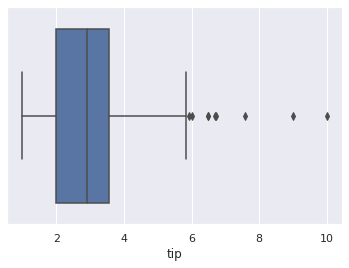

In [ ]:
sns.boxplot(df['tip'])

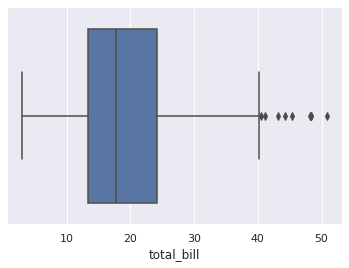

In [ ]:
sns.boxplot(df['total_bill'])

In [ ]:
# Excluir os outliers

df = df[(df['total_bill'] < 40) & (df['tip'] < 6)]

In [ ]:
df.shape

(229, 7)

Qual a relação entre as variáveis “smoker”, “sex” e “time” com a variável “tip”?

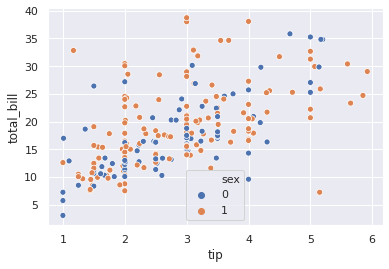

In [ ]:
sns.scatterplot('tip', 'total_bill', data=df, hue='sex')

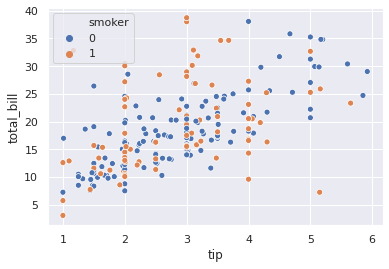

In [ ]:
sns.scatterplot('tip', 'total_bill', data=df, hue='smoker')

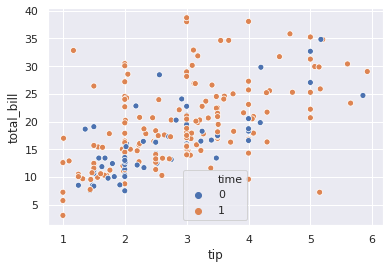

In [ ]:
sns.scatterplot('tip', 'total_bill', data=df, hue='time')

Text(0.5, 1.0, 'Média de gorjetas por sexo')

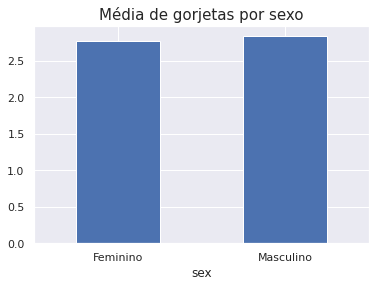

In [ ]:
df.groupby('sex')['tip'].mean().plot(kind='bar')
plt.xticks([0,1], ['Feminino', 'Masculino'], rotation=0)
plt.title('Média de gorjetas por sexo', size=15)

In [ ]:
df.groupby('sex')['tip'].median()

sex
0    2.68
1    2.71
Name: tip, dtype: float64

In [ ]:
df.groupby('smoker')['tip'].mean()

smoker
0    2.817778
1    2.800941
Name: tip, dtype: float64

Text(0.5, 1.0, 'Mediana de gorjetas pelo fato de ser fumante')

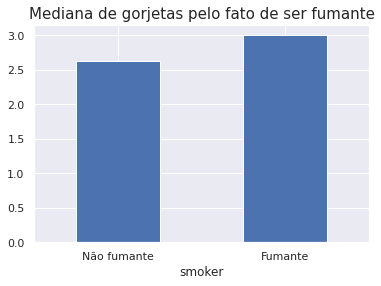

In [ ]:
df.groupby('smoker')['tip'].median().plot(kind='bar')
plt.xticks([0,1], ['Não fumante', 'Fumante'], rotation=0)
plt.title('Mediana de gorjetas pelo fato de ser fumante', size=15)

Text(0.5, 1.0, 'Média de gorjetas de acordo com o horário')

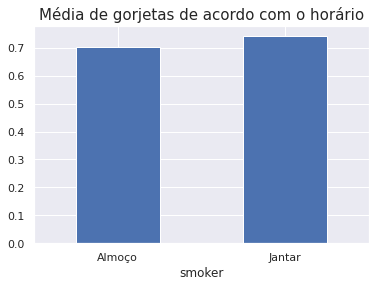

In [ ]:
df.groupby('smoker')['time'].mean().plot(kind='bar')
plt.xticks([0,1], ['Almoço', 'Jantar'], rotation=0)
plt.title('Média de gorjetas de acordo com o horário', size=15)

In [ ]:
df.groupby('smoker')['time'].median()

smoker
0    1
1    1
Name: time, dtype: int64

Se o restaurante quisesse fazer uma promoção, qual dia seria o melhor para ser realizada?

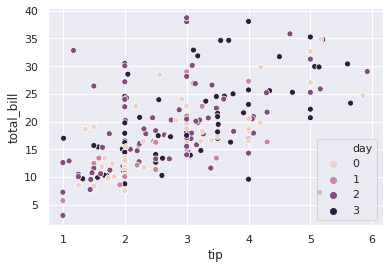

In [ ]:
sns.scatterplot('tip', 'total_bill', data=df, hue='day')

Text(0.5, 1.0, 'Média do valor das contas por dia da semana')

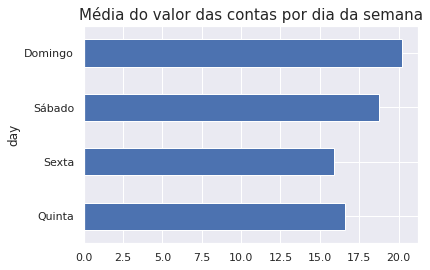

In [ ]:
_ = df.groupby('day')['total_bill'].mean().plot(kind='barh')
plt.yticks([0,1,2,3],['Quinta', 'Sexta', 'Sábado', 'Domingo'])
plt.title('Média do valor das contas por dia da semana', size=15)

In [ ]:
df.groupby('day')['total_bill'].median()

day
0    15.98
1    14.40
2    17.82
3    18.29
Name: total_bill, dtype: float64

O dia da semana escolhido seria domingo.

Descreva perfis de clientes e como os perfis se relacionam o consumo (“total_bill”)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

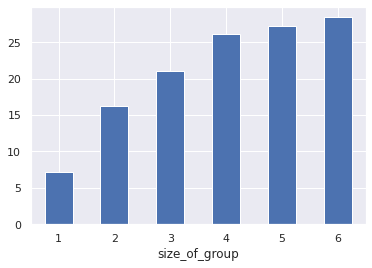

In [ ]:
df.groupby('size_of_group')['total_bill'].mean().plot(kind='bar')
plt.xticks(rotation=0)

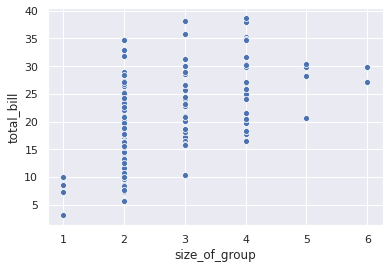

In [ ]:
sns.scatterplot('size_of_group', 'total_bill', data=df)

In [ ]:
df.groupby('sex')['smoker'].mean()

sex
0    0.357143
1    0.379310
Name: smoker, dtype: float64

**Modelo**

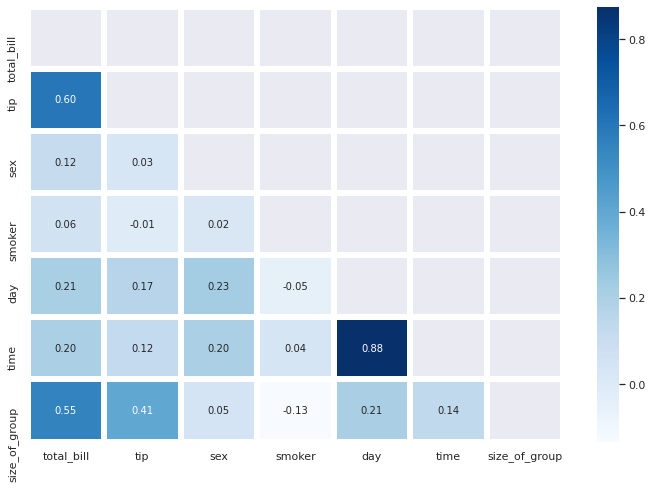

In [ ]:
corr = df.corr()

plt.figure(figsize=(12,8))
mask = np.triu(np.ones(corr.shape, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap="Blues", linewidths=5, fmt='.2f')

**Regressão simples**

In [ ]:
  X = df['tip']
  y = df['total_bill']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [ ]:
print('Tamanho do banco de dados de treino de Y:', y_train.shape)
print('Tamanho do banco de dados de teste de Y:', y_test.shape)
print('Tamanho do banco de dados de treino de X:', X_train.shape)
print('Tamanho do banco de dados de teste de X:', X_test.shape)

Tamanho do banco de dados de treino de Y: (160,)
Tamanho do banco de dados de teste de Y: (69,)
Tamanho do banco de dados de treino de X: (160,)
Tamanho do banco de dados de teste de X: (69,)


In [ ]:
reg = LinearRegression()

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
reg.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = reg.predict(X_test.reshape(-1,1))

In [ ]:
# Coeficientes
print('Intercepto: ', reg.intercept_)
print('Coeficiente: ', reg.coef_)
print('\n')
# Métricas
print('MSE: %.2f'% mean_squared_error(y_test, y_pred))
print('R2: %.2f'% r2_score(y_test, y_pred))

Intercepto:  [6.81822061]
Coeficiente:  [[4.0781578]]


MSE: 34.95
R2: 0.26


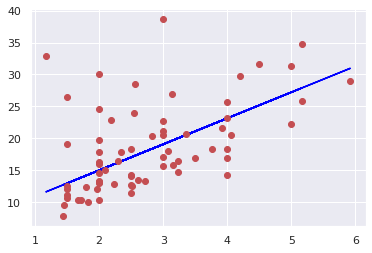

In [ ]:
# Plota o modelo
plt.plot(X_test, y_pred, color='blue')
plt.plot(X_test, y_test, 'ro')

**Regressão múltipla**

In [ ]:
X = df.drop(columns='total_bill')
y = df['total_bill']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
# Coeficientes
print('Intercepto: ', reg.intercept_)
print('Coeficientes: ', reg.coef_)
print('\n')
# Métricas
print('R2 :', reg.score(X_test, y_test))

Intercepto:  -0.7894106717523144
Coeficientes:  [ 2.97947744  0.97144523  1.94410213 -0.74930514  4.00126791  3.17076492]


R2 : 0.34467613126391716


In [ ]:
# Aplica a normalização
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
reg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = reg.predict(X_test_scaled)

In [ ]:
# Coeficientes
print('Intercepto: ', reg.intercept_)
print('Coeficientes: ', reg.coef_)
print('\n')
# Métricas
print('R2 :', reg.score(X_test, y_test))

Intercepto:  18.36425
Coeficientes:  [ 3.29153273  0.47326809  0.94423829 -0.86042737  1.79900689  2.76619711]


R2 : -5.244847236611463


In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
X = df.drop(columns=['total_bill', 'day'])
y = df['total_bill']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [ ]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
# Coeficientes
print('Intercepto: ', reg.intercept_)
print('Coeficientes: ', reg.coef_)
print('\n')
# Métricas
print('R2 :', reg.score(X_test, y_test))

Intercepto:  -0.594370325525496
Coeficientes:  [2.96203093 0.84715285 2.03621422 2.41047952 3.06389256]


R2 : 0.3441396150118532
